<a href="https://colab.research.google.com/github/Gebreyowhans/Deep_Learning/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gebreyowhansh","key":"c08764250c88a5895d973bcda84f8d0a"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:47<00:00, 18.3MB/s]
100% 812M/812M [00:47<00:00, 18.0MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

In [7]:
import os, shutil, pathlib

In [8]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [9]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=4500)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
#Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
])

# Data preporcessing
1.Decode the image in to size of RGB of size 180 by 180  and batch size and

2.preparing traing,validation and test data sets from the whole data set

3.Using image_dataset_from_directory to read images

In [ ]:
#Decode the image in to size of RGB of size 180 by 180  and batch size and 
#preparing traing,validation and test data sets from the whole data set
#Using image_dataset_from_directory to read images
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
new_base_dir / "train",
image_size=(180, 180),
batch_size=32)
validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [12]:
#Decode the image in to size of RGB of size 180 by 180  and batch size and 
#preparing traing,validation and test data sets from the whole data set
#Using image_dataset_from_directory to read images
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
new_base_dir / "train",
image_size=(180, 180),
batch_size=32)
validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


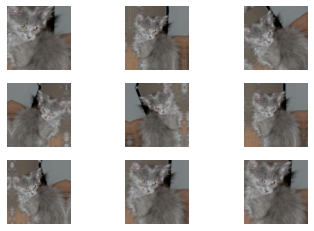

In [13]:
#Displaying some randomly augmented training images
import matplotlib.pyplot as plt
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

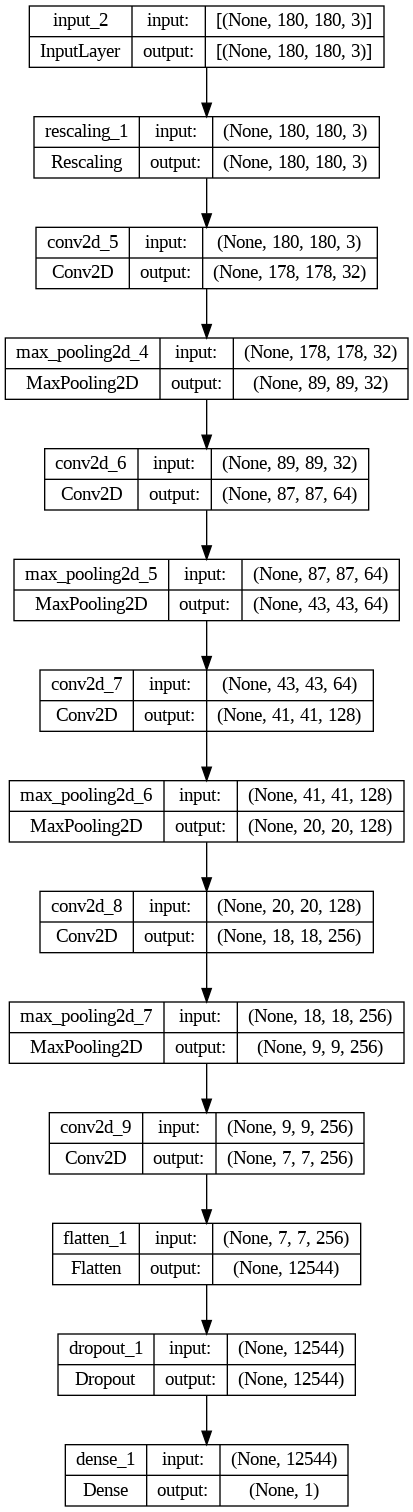

In [15]:

inputs = keras.Input(shape=(180, 180, 3))
x=data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x=layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
tf.keras.utils.plot_model(model,show_shapes=True)

In [16]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [17]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [18]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [19]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]


In [20]:
history = model.fit(
train_dataset,
epochs=50,
batch_size=128,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - 20s 57ms/step - loss: 0.6987 - accuracy: 0.5315 - val_loss: 0.7910 - val_accuracy: 0.5000
Epoch 2/50
125/125 [==============================] - 8s 64ms/step - loss: 0.6598 - accuracy: 0.6005 - val_loss: 0.6383 - val_accuracy: 0.6270
Epoch 3/50
125/125 [==============================] - 8s 62ms/step - loss: 0.6335 - accuracy: 0.6463 - val_loss: 0.5863 - val_accuracy: 0.6960
Epoch 4/50
125/125 [==============================] - 7s 54ms/step - loss: 0.5801 - accuracy: 0.6927 - val_loss: 0.5607 - val_accuracy: 0.7050
Epoch 5/50
125/125 [==============================] - 8s 63ms/step - loss: 0.5522 - accuracy: 0.7157 - val_loss: 0.5684 - val_accuracy: 0.7180
Epoch 6/50
125/125 [==============================] - 7s 54ms/step - loss: 0.5211 - accuracy: 0.7408 - val_loss: 0.5270 - val_accuracy: 0.7330
Epoch 7/50
125/125 [==============================] - 8s 63ms/step - loss: 0.4754 - accuracy: 0.7775 - val_loss: 0.5117 - val_accuracy: 0.746

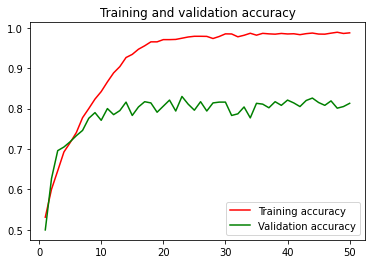

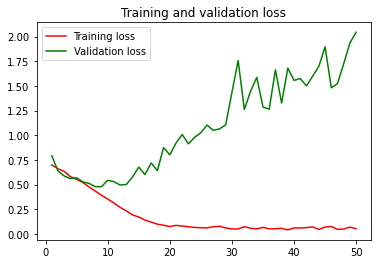

In [21]:
#Displaying curves of loss and accuracy during training

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [23]:
#Evaluating the model on the test set
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 6s 47ms/step - loss: 0.5159 - accuracy: 0.7818
Test accuracy: 0.782


In [ ]:
#Evaluating the model on the test set after augumentation
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 5s 39ms/step - loss: 0.5164 - accuracy: 0.7692
Test accuracy: 0.769


# **Using Pretrained Convolutional netwoks**


In [ ]:
#Instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [ ]:
#Summary of the conv base model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION**

In [ ]:
import numpy as np

In [ ]:
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


**The extracted features are currently of shape (samples,5, 5, 512):**

In [ ]:
train_features.shape

(4000, 5, 5, 512)

**Defining and training the densely connected classifier that receives a numpy array outpted from the convbase pretrained model**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction.keras",
save_best_only=True,
monitor="val_loss")
]

In [ ]:
history = model.fit(
train_features, train_labels,
epochs=20,
validation_data=(val_features, val_labels),
callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 1s 6ms/step - loss: 13.4504 - accuracy: 0.9383 - val_loss: 4.1516 - val_accuracy: 0.9720
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 3.3266 - accuracy: 0.9793 - val_loss: 7.3072 - val_accuracy: 0.9650
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 2.0801 - accuracy: 0.9887 - val_loss: 4.9272 - val_accuracy: 0.9730
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 1.3674 - accuracy: 0.9893 - val_loss: 5.4851 - val_accuracy: 0.9770
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.7698 - accuracy: 0.9930 - val_loss: 6.5282 - val_accuracy: 0.9750
Epoch 6/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5754 - accuracy: 0.9945 - val_loss: 5.8094 - val_accuracy: 0.9740
Epoch 7/20
125/125 [==============================] - 1s 4ms/step - loss: 0.4793 - accuracy: 0.9952 - val_loss: 12.8314 - val_accuracy: 0.9690
Epoc

**Plotting the results of Feature extraction without augumentation**

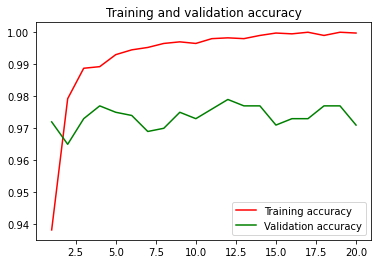

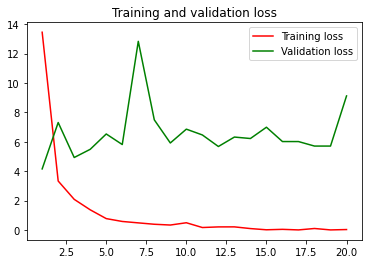

In [ ]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r", label="Training accuracy")

plt.plot(epochs, val_acc, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Testing the accuracy of the above model on test data **

In [ ]:
feature_extraction_model_without_augumentation = keras.models.load_model(
"feature_extraction.keras")
test_loss, test_acc = feature_extraction_model_without_augumentation.evaluate(test_features,test_labels)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 0s 2ms/step - loss: 4.8076 - accuracy: 0.9712
Test accuracy: 0.971


**FEATURE EXTRACTION TOGETHER WITH DATA AUGMENTATION**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base_With_Augumentation = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
#freez the model
conv_base_With_Augumentation.trainable = False;

#Printing the list of trainable weights before and after freezing

In [ ]:
conv_base_With_Augumentation.trainable = True
print("This is the number of trainable weights "
"before freezing the conv base:", len(conv_base_With_Augumentation.trainable_weights))

conv_base_With_Augumentation.trainable = False
print("This is the number of trainable weights "
"after freezing the conv base:", len(conv_base_With_Augumentation.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
])
inputs = keras.Input(shape=(180, 180, 3))

#apply augumentation
x = data_augmentation(inputs)

#apply pixel value scalling
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base_With_Augumentation(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

**Train with augumentation**

In [ ]:
history = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - 25s 186ms/step - loss: 14.9796 - accuracy: 0.9160 - val_loss: 6.7742 - val_accuracy: 0.9640
Epoch 2/50
125/125 [==============================] - 23s 179ms/step - loss: 7.0727 - accuracy: 0.9470 - val_loss: 4.1827 - val_accuracy: 0.9720
Epoch 3/50
125/125 [==============================] - 23s 185ms/step - loss: 5.2880 - accuracy: 0.9603 - val_loss: 3.0857 - val_accuracy: 0.9760
Epoch 4/50
125/125 [==============================] - 23s 178ms/step - loss: 4.1705 - accuracy: 0.9622 - val_loss: 3.7748 - val_accuracy: 0.9750
Epoch 5/50
125/125 [==============================] - 23s 181ms/step - loss: 3.3586 - accuracy: 0.9685 - val_loss: 2.7816 - val_accuracy: 0.9770
Epoch 6/50
125/125 [==============================] - 24s 187ms/step - loss: 2.8100 - accuracy: 0.9672 - val_loss: 3.4582 - val_accuracy: 0.9720
Epoch 7/50
125/125 [==============================] - 22s 177ms/step - loss: 2.3967 - accuracy: 0.9690 - val_loss: 2.0620 - val_a

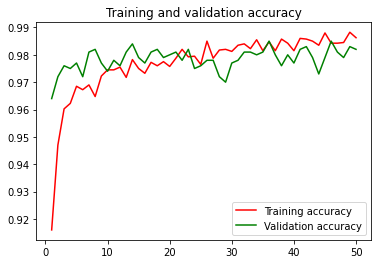

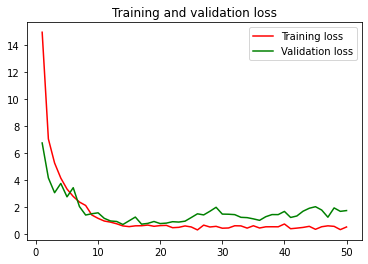

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r", label="Training accuracy")

plt.plot(epochs, val_acc, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Evaluating the model on the test set
FeatureExtraction_with_augumentation_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = FeatureExtraction_with_augumentation_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 16s 122ms/step - loss: 1.1159 - accuracy: 0.9780
Test accuracy: 0.978


# **Fine-tuning a pretrained model**

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base_With_Augumentation.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="fine_tuning.keras",
save_best_only=True,
monitor="val_loss")
]


In [ ]:
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - 53s 386ms/step - loss: 0.7616 - accuracy: 0.9737 - val_loss: 2.1899 - val_accuracy: 0.9590
Epoch 2/30
125/125 [==============================] - 48s 384ms/step - loss: 0.5537 - accuracy: 0.9778 - val_loss: 1.1060 - val_accuracy: 0.9710
Epoch 3/30
125/125 [==============================] - 48s 385ms/step - loss: 0.3736 - accuracy: 0.9790 - val_loss: 1.0997 - val_accuracy: 0.9750
Epoch 4/30
125/125 [==============================] - 48s 383ms/step - loss: 0.3189 - accuracy: 0.9815 - val_loss: 0.7420 - val_accuracy: 0.9780
Epoch 5/30
125/125 [==============================] - 48s 385ms/step - loss: 0.2782 - accuracy: 0.9815 - val_loss: 0.5595 - val_accuracy: 0.9740
Epoch 6/30
125/125 [==============================] - 48s 381ms/step - loss: 0.2199 - accuracy: 0.9818 - val_loss: 0.6162 - val_accuracy: 0.9690
Epoch 7/30
125/125 [==============================] - 48s 385ms/step - loss: 0.1674 - accuracy: 0.9840 - val_loss: 0.5246 - val_ac

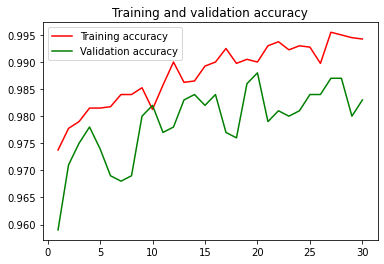

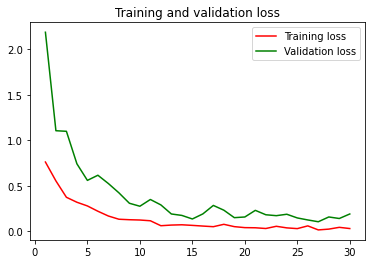

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r", label="Training accuracy")

plt.plot(epochs, val_acc, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
#finally evaluate this model on the test data:
fine_tuned_model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = fine_tuned_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 15s 117ms/step - loss: 0.3554 - accuracy: 0.9787
Test accuracy: 0.979
